<a href="https://colab.research.google.com/github/mohan-mj/Random-Forest-Classification/blob/master/Random%20Forest%20Classification-Transfusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/mohan-mj/Random-Forest-Classification/master/transfusion.csv')
dataset.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
# dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
# split the data into X and y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
# shape of X
X.shape

(748, 4)

In [7]:
# shape of y
y.shape

(748,)

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 40)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 40)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

In [21]:
# Predict
y_pred = classifier.predict(X_train)

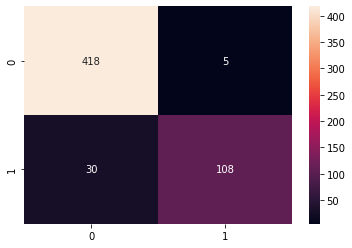

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [25]:
# (cm.diagonal().sum()/cm.sum())*100
classifier.score(X_train,y_train)*100

93.76114081996435

In [24]:
classifier.score(X_test,y_test)*100

77.54010695187165

In [26]:
cm1 = confusion_matrix(y_test, classifier.predict(X_test))
cm1

array([[131,  16],
       [ 26,  14]])

In [27]:
(cm1.diagonal().sum()/cm1.sum())*100

77.54010695187165